In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime,timedelta
import scipy.integrate as spi
import pylab as pl


from lmfit import minimize, Parameters, Parameter, report_fit
from scipy.signal import savgol_filter
import operator
#from pyDOE import *
from mpl_toolkits.mplot3d import Axes3D
from pylab import *

In [2]:
coinf_timeseries=np.loadtxt("coinf_timeseries.csv")
measles_timeseries=np.loadtxt("measles_timeseries.csv")

In [3]:
def coinf_exp_model(INP,t,ps):  
    try:
        beta0=ps['beta0'].value
        beta1=ps['beta1'].value
        gamma0=ps['gamma0'].value
        gamma1=ps['gamma1'].value
        c1=ps['c1'].value
        c2=ps['c2'].value
        c3=ps['c3'].value
        sigma=ps['sigma'].value
        omega=ps['omega'].value
        
    except:
        beta0,beta1,gamma0,gamma1,c=ps
    N=2618
    
    
    
    
    mu=np.array([c1*omega,c2*omega,c2*gamma1])
    
    beta=np.hstack((beta0/N,beta1/N))
    
    Y=np.zeros((12))
    V = INP    
    #SS
    
    Y[0]=-beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[0]*(V[4]+V[5])+gamma0*V[1]
    
 
    #IS 0 pathogen
    Y[1]=beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[1]*(V[4]+V[5])-gamma0*V[1]
    
    #SE 1 measles
    
    Y[2]=beta[1]*V[0]*(V[4]+V[5])-sigma*V[2]-beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma0*V[3]
    
    #IE
    
    Y[3]= beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma0*V[3]-sigma*V[3]+beta[1]*V[1]*(V[4]+V[5])
    
    #SI 1 measles
    Y[4]=sigma*V[2]-beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])-omega*V[4]+gamma0*V[5]-mu[0]*V[4]
    
    
    #II 0 and 1 measles and pathogen
    Y[5]=beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])+sigma*V[3]-gamma0*V[5]-omega*V[5]-mu[1]*V[5]
    
    

    
    
    
    Y[6]=omega*V[4]-gamma1*V[6]+gamma0*V[7]-beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])
    


    
    Y[7]=omega*V[5]+beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma1*V[7]-mu[2]*V[7]-gamma0*V[7]
    


    
    Y[8]=gamma1*V[6]+gamma0*V[9]-beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])
    

    
    
    Y[9]=beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma1*V[7]-gamma0*V[9]
    
    Y[10]=mu[0]*V[4]
    Y[11]=mu[1]*V[5]+mu[2]*V[7]

    
    return Y   # For odeint


In [26]:
def g(t, INP, ps):
    
    
    RES = spi.odeint(coinf_exp_model,INP,t,args=(ps,))
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
    
    x=np.array((res_measles,res_coinf))
 
    return x

def residual(ps,INP, ts, data):
    IS=ps['IS'].value
#     N=2618
#     beta=ps['beta0'].value
#     gamma=ps['gamma0'].value
#     IS=(1-(gamma/beta))*N
    INP=(N-IS-2,IS,0,0,2,0,0,0,0,0,0,0)
    RES = spi.odeint(coinf_exp_model,INP,ts,args=(ps,))
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
    model=np.array((res_measles,res_coinf))

    return (model - data).ravel()

def residual2(ps,INP, ts, data):
    IS=ps['IS'].value
#     N=2618
#     beta=ps['beta0'].value
#     gamma=ps['gamma0'].value
#     IS=(1-(gamma/beta))*N
    INP=(N-IS-2,IS,0,0,2,0,0,0,0,0,0,0)
    RES = spi.odeint(coinf_exp_model_IX,INP,ts,args=(ps,))
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
    model=np.array((res_measles,res_coinf))

    return (model - data).ravel()

def residual3(ps,INP, ts, data):
    IS=ps['IS'].value
# #     N=2618
# #     beta=ps['beta0'].value
# #     gamma=ps['gamma0'].value
# #     IS=(1-(gamma/beta))*N
    INP=(N-IS-2,IS,0,0,2,0,0,0,0,0,0,0)
    RES = spi.odeint(coinf_exp_model_3,INP,ts,args=(ps,))
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
    model=np.array((res_measles,res_coinf))

    return (model - data).ravel()

def residual4(ps,INP, ts, data):
    IS=ps['IS'].value
#     N=2618
#     beta=ps['beta0'].value
#     gamma=ps['gamma0'].value
#     IS=(1-(gamma/beta))*N
    INP=(N-2617-2,IS,0,0,2,0,0,0,0,0,0,0)
    RES = spi.odeint(coinf_exp_model_IX4,INP,ts,args=(ps,))
    res_measles=RES[1:ts_len+1,10]-RES[0:ts_len,10]
    res_coinf=RES[1:ts_len+1,11]-RES[0:ts_len,11]
    model=np.array((res_measles,res_coinf))

    return (model - data).ravel()




In [5]:
N=2618
#sigma=1/14
IS0=670
SE0=0
IE0=0
SI0=2
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0-SI0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
ts_len=len(measles_timeseries)


TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)


time_series=np.array((measles_timeseries,coinf_timeseries))


# set parameters incluing bounds
params = Parameters()
params.add('beta0',value=1.2,min=0.001,max=3)
params.add('beta1',value=1,min=(2/13),max=(20/6))
params.add('gamma0',value=0.1,min=0.005,max=0.9)
params.add('gamma1',value=0.1,min=0.01,max=2)
params.add('c1',value=0.1,min=0.001,max=0.5)
params.add('c2',value=0.1,min=0.001,max=0.5)
params.add('c3',value=0.1,min=0.001,max=0.5)
params.add('sigma',value=0.1,min=1/21,max=1/7)
params.add('omega',value=0.1,min=1/13,max=1/6)
params.add('IS',value=600,min=1,max=2618)

#params.add('IS',value=600,min=1,max=2618)

# fit model and find predicted values
result = minimize(residual, params, args=(INPUT,t_range, time_series), method='leastsq')
#result = minimize(residual, params, args=(INPUT,t_range, time_series), method='lbfgsb' )
final = time_series + result.residual.reshape(time_series.shape)


In [6]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 2603
    # data points      = 320
    # variables        = 10
    chi-square         = 519.287118
    reduced chi-square = 1.67511974
    Akaike info crit   = 174.923504
    Bayesian info crit = 212.606713
[[Variables]]
    beta0:   0.43715342 (init = 1.2)
    beta1:   0.48001617 (init = 1)
    gamma0:  0.04421012 (init = 0.1)
    gamma1:  0.55952913 (init = 0.1)
    c1:      0.25546242 (init = 0.1)
    c2:      0.07320888 (init = 0.1)
    c3:      0.10000000 (init = 0.1)
    sigma:   0.11801527 (init = 0.1)
    omega:   0.16495357 (init = 0.1)
    IS:      1.01393313 (init = 600)


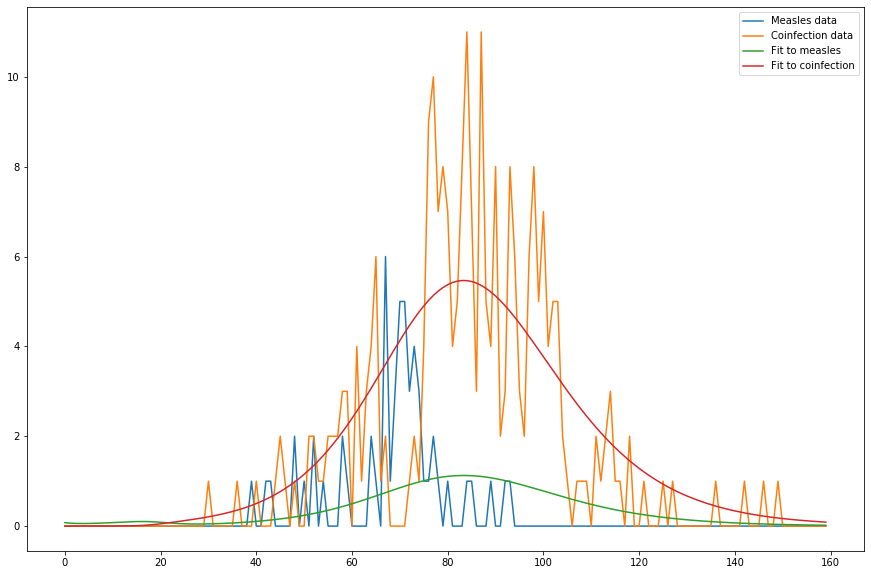

In [7]:
plt.figure(figsize=(15,10))
#RES = spi.odeint(coinf_exp_model,INPUT,t_range,result.params())
#plt.plot(RES[:,5])
plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final[0],label="Fit to measles")
plt.plot(final[1],label="Fit to coinfection")
#measles_ts_smooth = savgol_filter(measles_timeseries, 41, 3)
#coinf_ts_smooth = savgol_filter(coinf_timeseries, 41, 3)
#plt.plot(measles_ts_smooth)
#plt.plot(coinf_ts_smooth)
# beta0,beta1,gamma0,gamma1,c=1.2,1.5,0.1,0.1,0.3
# true_params = np.array((beta0,beta1,gamma0,gamma1,c))
# data = g(t_range, INPUT, true_params)
#data += np.random.normal(size=data.shape)
# plt.plot(data[0],label="Measles")
# plt.plot(data[1],label="coinf")
plt.legend()
plt.show()

In [8]:
def coinf_exp_model_IX(INP,t,ps):  
    try:
        beta0=ps['beta0'].value
        beta1=ps['beta1'].value
        gamma0=ps['gamma0'].value
        gamma1=ps['gamma1'].value
        c1=ps['c1'].value
        c2=ps['c2'].value
        c3=ps['c3'].value
        sigma=ps['sigma'].value
        omega=ps['omega'].value
        
    except:
        beta0,beta1,gamma0,gamma1,c=ps
    N=2618
    
    
    
    
    mu=np.array([c1*omega,c2*omega,c2*gamma1])
    
    beta=np.hstack((beta0/N,beta1/N))
    
    Y=np.zeros((12))
    V = INP    
    #SS
    
    Y[0]=-beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[0]*(V[4]+V[5])+gamma0*V[1]
    
 
    #IS 0 pathogen
    Y[1]=beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[1]*(V[4]+V[5])-gamma0*V[1]
    
    #SE 1 measles
    
    Y[2]=beta[1]*V[0]*(V[4]+V[5])-sigma*V[2]-beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma0*V[3]
    
    #IE
    
    Y[3]= beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma0*V[3]-sigma*V[3]+beta[1]*V[1]*(V[4]+V[5])
    
    #SI 1 measles
    Y[4]=sigma*V[2]-beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])-omega*V[4]+gamma0*V[5]-mu[0]*V[4]
    
    
    #II 0 and 1 measles and pathogen
    Y[5]=beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])+sigma*V[3]-gamma0*V[5]-omega*V[5]-mu[1]*V[5]
    
    

    
    
    
    Y[6]=omega*V[4]-gamma1*V[6]+gamma0*V[7]-beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])
    


    
    Y[7]=omega*V[5]+beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma1*V[7]-mu[2]*V[7]-gamma0*V[7]
    


    
    Y[8]=gamma1*V[6]+gamma0*V[9]-beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])
    

    
    
    Y[9]=beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma1*V[7]-gamma0*V[9]
    
    Y[10]=mu[0]*V[4]+mu[1]*V[5]
    Y[11]=mu[2]*V[7]

    
    return Y   # For odeint


In [9]:
N=2618
#sigma=1/14
IS0=670
SE0=0
IE0=0
SI0=2
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0-SI0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
ts_len=len(measles_timeseries)


TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)


time_series=np.array((measles_timeseries,coinf_timeseries))


# set parameters incluing bounds
params = Parameters()
params.add('beta0',value=1.2,min=0.001,max=3)
params.add('beta1',value=1,min=(2/13),max=(20/6))
params.add('gamma0',value=0.1,min=0.005,max=0.9)
params.add('gamma1',value=0.1,min=0.01,max=2)
params.add('c1',value=0.1,min=0.001,max=0.5)
params.add('c2',value=0.1,min=0.001,max=0.5)
params.add('c3',value=0.1,min=0.001,max=0.5)
params.add('sigma',value=0.1,min=1/21,max=1/7)
params.add('omega',value=0.1,min=1/13,max=1/6)


params.add('IS',value=600,min=1,max=2618)

# fit model and find predicted values
result = minimize(residual2, params, args=(INPUT,t_range, time_series), method='leastsq')
#result = minimize(residual, params, args=(INPUT,t_range, time_series), method='lbfgsb' )
final2 = time_series + result.residual.reshape(time_series.shape)


In [10]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 340
    # data points      = 320
    # variables        = 10
    chi-square         = 840.750175
    reduced chi-square = 2.71209734
    Akaike info crit   = 329.111540
    Bayesian info crit = 366.794750
[[Variables]]
    beta0:   2.49169218 (init = 1.2)
    beta1:   0.47460927 (init = 1)
    gamma0:  0.13810335 (init = 0.1)
    gamma1:  0.13857085 (init = 0.1)
    c1:      0.00102220 (init = 0.1)
    c2:      0.07480981 (init = 0.1)
    c3:      0.10000000 (init = 0.1)
    sigma:   0.10880413 (init = 0.1)
    omega:   0.13376418 (init = 0.1)
    IS:      2617.99954 (init = 600)


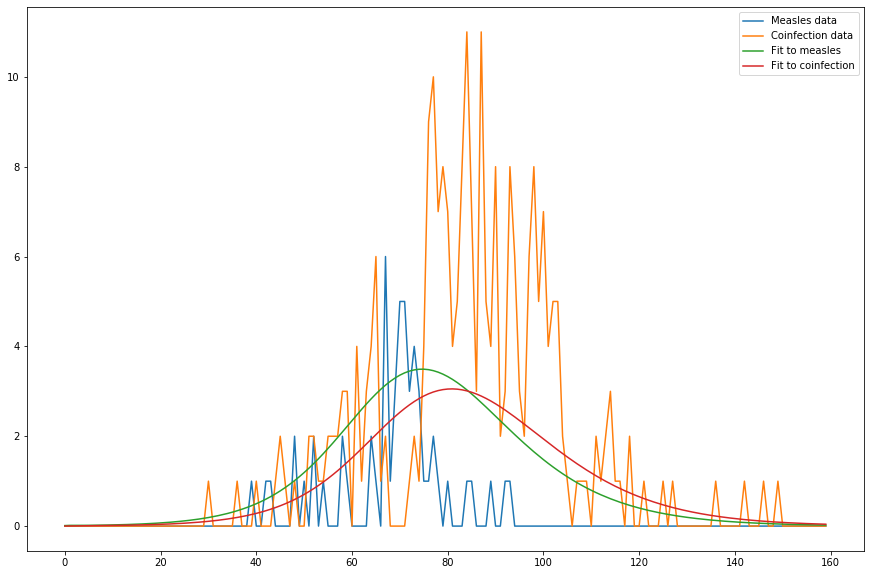

In [11]:
plt.figure(figsize=(15,10))

plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final2[0],label="Fit to measles")
plt.plot(final2[1],label="Fit to coinfection")

plt.legend()
plt.show()

In [12]:
def coinf_exp_model_3(INP,t,ps):  
    try:
#         beta0=ps['beta0'].value
#         beta1=ps['beta1'].value
#         gamma0=ps['gamma0'].value
#         gamma1=ps['gamma1'].value
        c1=ps['c1'].value
        c2=ps['c2'].value
        c3=ps['c3'].value
#         sigma=ps['sigma'].value
#         omega=ps['omega'].value
        
    except:
        #beta0,beta1,gamma0,gamma1,
        c=ps
    N=2618




    mu=np.array([c1*omega,c2*omega,c3*gamma1])

    beta=np.hstack((beta0/N,beta1/N))

    Y=np.zeros((12))
    V = INP    
    #SS

    Y[0]=-beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[0]*(V[4]+V[5])+gamma0*V[1]


    #IS 0 pathogen
    Y[1]=beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[1]*(V[4]+V[5])-gamma0*V[1]

    #SE 1 measles

    Y[2]=beta[1]*V[0]*(V[4]+V[5])-sigma*V[2]-beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma0*V[3]

    #IE

    Y[3]= beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma0*V[3]-sigma*V[3]+beta[1]*V[1]*(V[4]+V[5])

    #SI 1 measles
    Y[4]=sigma*V[2]-beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])-omega*V[4]+gamma0*V[5]-mu[0]*V[4]


    #II 0 and 1 measles and pathogen
    Y[5]=beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])+sigma*V[3]-gamma0*V[5]-omega*V[5]-mu[1]*V[5]






    Y[6]=omega*V[4]-gamma1*V[6]+gamma0*V[7]-beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])




    Y[7]=omega*V[5]+beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma1*V[7]-mu[2]*V[7]-gamma0*V[7]




    Y[8]=gamma1*V[6]+gamma0*V[9]-beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])




    Y[9]=beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma1*V[7]-gamma0*V[9]

    Y[10]=mu[0]*V[4]
    Y[11]=mu[1]*V[5]+mu[2]*V[7]


    return Y   # For odeint


In [30]:
N=2618

#IS0=670
IS0=2617
SE0=0
IE0=0
SI0=2
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0-SI0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
ts_len=len(measles_timeseries)

beta0=   2.49169218 
beta1=   0.47460927 
gamma0=  0.13810335 
gamma1=  0.13857085 

sigma=  0.10880413 
omega=   0.13376418 

TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)


time_series=np.array((measles_timeseries,coinf_timeseries))


# set parameters incluing bounds
params = Parameters()
# params.add('beta0',value=1.2,min=0.001,max=6)
# params.add('beta1',value=1,min=(2/13),max=(20/6))
# params.add('gamma0',value=0.1,min=0.005,max=0.9)
# params.add('gamma1',value=0.1,min=0.01,max=2)
params.add('c1',value=0.1,min=0.001,max=0.5)
params.add('c2',value=0.1,min=0.001,max=0.5)
params.add('c3',value=0.1,min=0.001,max=0.5)
# params.add('sigma',value=0.1,min=1/21,max=1/7)
# params.add('omega',value=0.1,min=1/13,max=1/6)

params.add('IS',value=600,min=1,max=2618)

# fit model and find predicted values
result = minimize(residual3, params, args=(INPUT,t_range, time_series), method='leastsq')
#result = minimize(residual, params, args=(INPUT,t_range, time_series), method='lbfgsb' )
final3 = time_series + result.residual.reshape(time_series.shape)


In [31]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 320
    # variables        = 4
    chi-square         = 561.292831
    reduced chi-square = 1.77624314
    Akaike info crit   = 187.814961
    Bayesian info crit = 202.888245
[[Variables]]
    c1:  0.49843888 +/- 0.11413126 (22.90%) (init = 0.1)
    c2:  0.12184582 +/- 0.09245174 (75.88%) (init = 0.1)
    c3:  0.01491690 +/- 0.08215668 (550.76%) (init = 0.1)
    IS:  1.15904166 +/- 17.7224166 (1529.06%) (init = 600)
[[Correlations]] (unreported correlations are < 0.100)
    C(c2, c3) = -0.997
    C(c1, c2) =  0.642
    C(c1, c3) = -0.637
    C(c2, IS) = -0.367
    C(c3, IS) =  0.359
    C(c1, IS) = -0.210


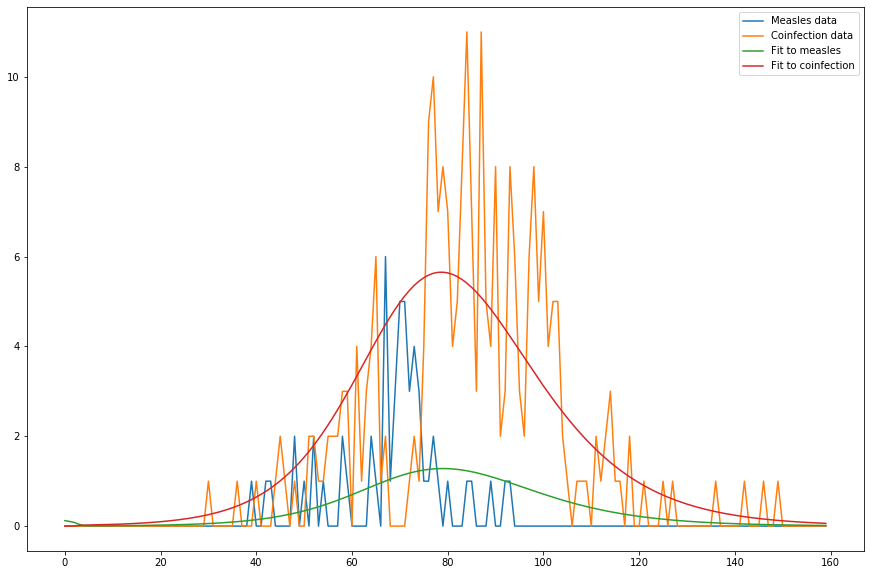

In [32]:
plt.figure(figsize=(15,10))

plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final3[0],label="Fit to measles")
plt.plot(final3[1],label="Fit to coinfection")

plt.legend()
plt.show()

In [16]:
def coinf_exp_model_IX4(INP,t,ps):  
    try:
#         beta0=ps['beta0'].value
#         beta1=ps['beta1'].value
#         gamma0=ps['gamma0'].value
#         gamma1=ps['gamma1'].value
        c1=ps['c1'].value
        c2=ps['c2'].value
        c3=ps['c3'].value
#         sigma=ps['sigma'].value
#         omega=ps['omega'].value
        
    except:
        #beta0,beta1,gamma0,gamma1,
        c=ps
    
    N=2618




    mu=np.array([c1*omega,c2*omega,c3*gamma1])

    beta=np.hstack((beta0/N,beta1/N))

    Y=np.zeros((12))
    V = INP    
    #SS

    Y[0]=-beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[0]*(V[4]+V[5])+gamma0*V[1]


    #IS 0 pathogen
    Y[1]=beta[0]*V[0]*(V[1]+V[3]+V[5]+V[7]+V[9])-beta[1]*V[1]*(V[4]+V[5])-gamma0*V[1]

    #SE 1 measles

    Y[2]=beta[1]*V[0]*(V[4]+V[5])-sigma*V[2]-beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma0*V[3]

    #IE

    Y[3]= beta[0]*V[2]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma0*V[3]-sigma*V[3]+beta[1]*V[1]*(V[4]+V[5])

    #SI 1 measles
    Y[4]=sigma*V[2]-beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])-omega*V[4]+gamma0*V[5]-mu[0]*V[4]


    #II 0 and 1 measles and pathogen
    Y[5]=beta[0]*V[4]*(V[1]+V[3]+V[5]+V[7]+V[9])+sigma*V[3]-gamma0*V[5]-omega*V[5]-mu[1]*V[5]






    Y[6]=omega*V[4]-gamma1*V[6]+gamma0*V[7]-beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])




    Y[7]=omega*V[5]+beta[0]*V[6]*(V[1]+V[3]+V[5]+V[7]+V[9])-gamma1*V[7]-mu[2]*V[7]-gamma0*V[7]




    Y[8]=gamma1*V[6]+gamma0*V[9]-beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])




    Y[9]=beta[0]*V[8]*(V[1]+V[3]+V[5]+V[7]+V[9])+gamma1*V[7]-gamma0*V[9]

    Y[10]=mu[0]*V[4]+mu[1]*V[5]
    Y[11]=mu[2]*V[7]


    return Y   # For odeint


In [27]:
N=2618
#sigma=1/14
IS0=2617
SE0=0
IE0=0
SI0=2
II0=0
SX0=0
IX0=0
SR0=0
IR0=0
SS0=N-IS0-SE0-SI0
INPUT=(SS0,IS0,SE0,IE0,SI0,II0,SX0,IX0,SR0,IR0,0,0)
ts_len=len(measles_timeseries)

beta0=   2.49169218 
beta1=   0.47460927 
gamma0=  0.13810335 
gamma1=  0.13857085 

sigma=  0.10880413 
omega=   0.13376418 
#IS:      2617.99954 


TS=1.0
ND=float(ts_len+1)
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)


time_series=np.array((measles_timeseries,coinf_timeseries))


# set parameters incluing bounds
params = Parameters()
# params.add('beta0',value=1.2,min=0.001,max=3)
# params.add('beta1',value=1,min=(2/13),max=(20/6))
# params.add('gamma0',value=0.1,min=0.005,max=0.9)
# params.add('gamma1',value=0.1,min=0.01,max=2)
params.add('c1',value=0.1,min=0.001,max=0.5)
params.add('c2',value=0.1,min=0.001,max=0.5)
params.add('c3',value=0.1,min=0.001,max=0.5)
# params.add('sigma',value=0.1,min=1/21,max=1/7)
# params.add('omega',value=0.1,min=1/13,max=1/6)


params.add('IS',value=600,min=1,max=2618)

# fit model and find predicted values
result = minimize(residual4, params, args=(INPUT,t_range, time_series), method='leastsq')
#result = minimize(residual, params, args=(INPUT,t_range, time_series), method='lbfgsb' )
final4 = time_series + result.residual.reshape(time_series.shape)


In [28]:
report_fit(result)

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 97
    # data points      = 320
    # variables        = 4
    chi-square         = 511.029269
    reduced chi-square = 1.61718123
    Akaike info crit   = 157.793879
    Bayesian info crit = 172.867163
[[Variables]]
    c1:  0.00100372 +/- 3.98252092 (396774.18%) (init = 0.1)
    c2:  0.03064384 +/- 0.10716397 (349.71%) (init = 0.1)
    c3:  0.14753170 +/- 0.01079615 (7.32%) (init = 0.1)
    IS:  2466.49180 +/- 66.4365125 (2.69%) (init = 600)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = -0.999
    C(c3, IS) = -0.774
    C(c2, IS) = -0.739
    C(c1, IS) =  0.738
    C(c2, c3) =  0.613
    C(c1, c3) = -0.607


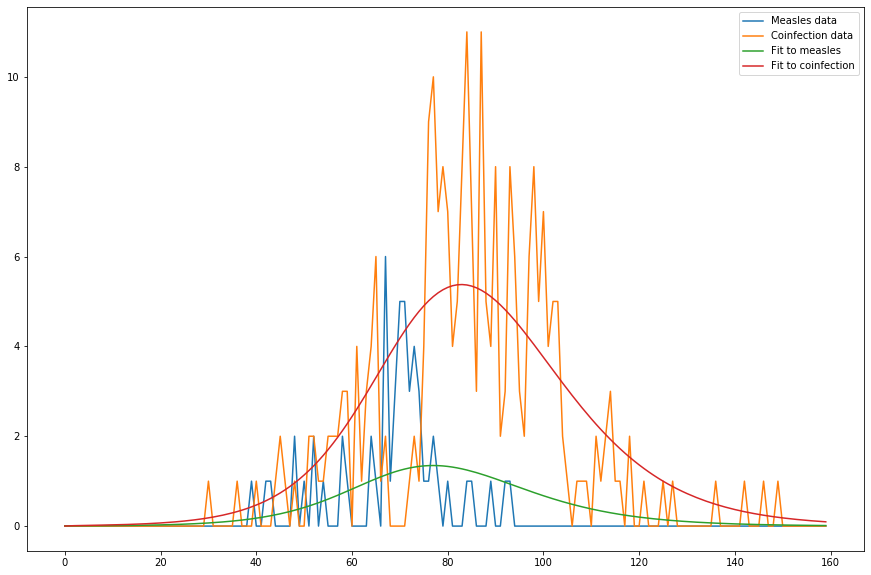

In [29]:
plt.figure(figsize=(15,10))

plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final4[0],label="Fit to measles")
plt.plot(final4[1],label="Fit to coinfection")

plt.legend()
plt.show()

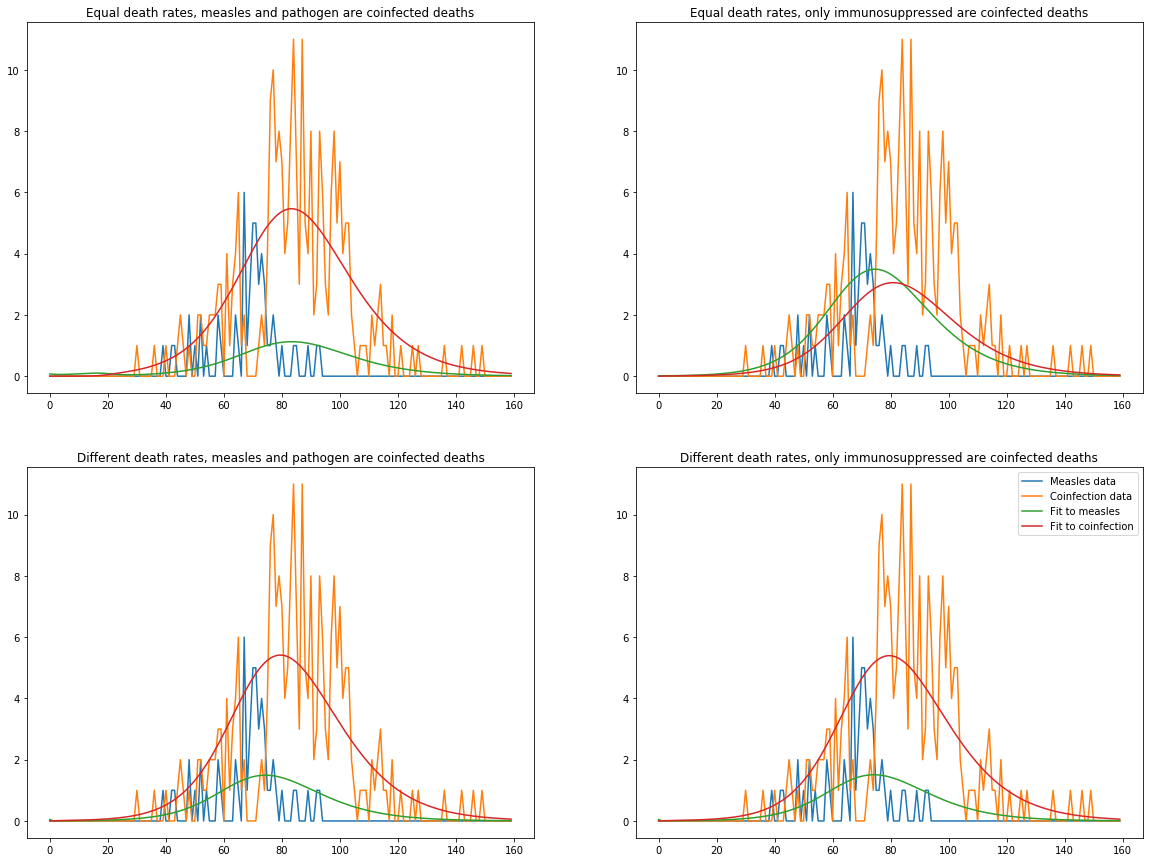

No handles with labels found to put in legend.


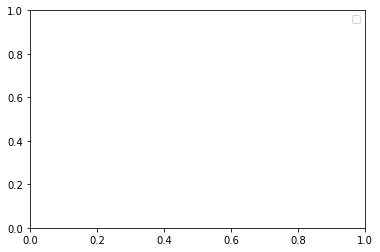

In [20]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final[0],label="Fit to measles")
plt.plot(final[1],label="Fit to coinfection")
plt.title('Equal death rates, measles and pathogen are coinfected deaths')

plt.subplot(2, 2, 2)
plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final2[0],label="Fit to measles")
plt.plot(final2[1],label="Fit to coinfection")
plt.title('Equal death rates, only immunosuppressed are coinfected deaths')

plt.subplot(2, 2, 3)
plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final3[0],label="Fit to measles")
plt.plot(final3[1],label="Fit to coinfection")
plt.title('Different death rates, measles and pathogen are coinfected deaths')

plt.subplot(2, 2, 4)
plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final4[0],label="Fit to measles")
plt.plot(final4[1],label="Fit to coinfection")
plt.title('Different death rates, only immunosuppressed are coinfected deaths')


plt.legend()
plt.show()

plt.legend()
plt.show()

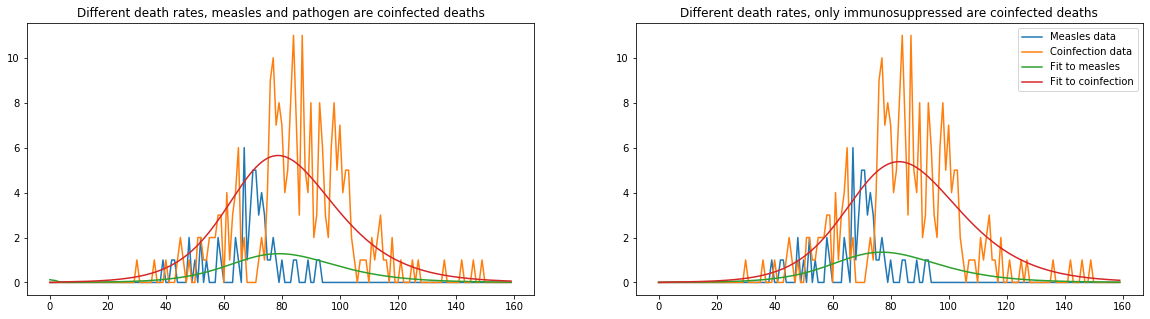

In [33]:
plt.figure(figsize=(20,5))


plt.subplot(1, 2, 1)
plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final3[0],label="Fit to measles")
plt.plot(final3[1],label="Fit to coinfection")
plt.title('Different death rates, measles and pathogen are coinfected deaths')

plt.subplot(1, 2, 2)
plt.plot(time_series[0],label="Measles data")
plt.plot(time_series[1],label="Coinfection data")
plt.plot(final4[0],label="Fit to measles")
plt.plot(final4[1],label="Fit to coinfection")
plt.title('Different death rates, only immunosuppressed are coinfected deaths')


plt.legend()
plt.show()
